<h1 align="center">DL Assignment: Car Price Prediction (Regression)</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from keras.utils.np_utils import to_categorical
from keras import models, layers, losses

# Loading Dataset

In [2]:
dataset_directory = '/content/drive/MyDrive/datasets/car_price_assignment.csv'

In [3]:
data_df = pd.read_csv(dataset_directory, index_col=0)

# Preprocessing Dataset

In [4]:
data_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data_df.shape

(205, 25)

## Checking for Duplicate Value

There are no duplicate rows.

In [7]:
data_df.duplicated().any()

False

## Checking for Missing Values

There are no missing values.

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Converting String Data to Numerical Data

There are some columns in the data containg strings. Let's convert them to numerical form.

But before that, the "CarName" column contains car model names. I think Car Name is irrelevant in our case. However, company's good will do have effect on a car price. So, let's convert this column to company/brand name.

In [9]:
def convert_to_brand_name(from_str, to_str):
  regexp = re.compile(from_str + "[0-9A-Z\s\-()]+", flags=re.RegexFlag.IGNORECASE)
  data_df["CarName"] = data_df["CarName"].replace(regexp, value=to_str, regex=True)

In [10]:
convert_to_brand_name(from_str="alfa", to_str="alfa romeo")
convert_to_brand_name(from_str="audi", to_str="audi")
convert_to_brand_name(from_str="bmw", to_str="bmw")
convert_to_brand_name(from_str="chevrolet", to_str="chevrolet")
convert_to_brand_name(from_str="dodge", to_str="dodge")
convert_to_brand_name(from_str="honda", to_str="honda")
convert_to_brand_name(from_str="isuzu", to_str="isuzu")
convert_to_brand_name(from_str="jaguar", to_str="jaguar")
convert_to_brand_name(from_str="ma", to_str="mazda")
convert_to_brand_name(from_str="buick", to_str="buick")
convert_to_brand_name(from_str="mercury", to_str="mercury")
convert_to_brand_name(from_str="mitsubishi", to_str="mitsubishi")
convert_to_brand_name(from_str="nissan", to_str="nissan")
convert_to_brand_name(from_str="peugeot", to_str="peugeot")
convert_to_brand_name(from_str="plymouth", to_str="plymouth")
convert_to_brand_name(from_str="por", to_str="porsche")
convert_to_brand_name(from_str="renault", to_str="renault")
convert_to_brand_name(from_str="saab", to_str="saab")
convert_to_brand_name(from_str="subaru", to_str="subaru")
convert_to_brand_name(from_str="to", to_str="toyota")
convert_to_brand_name(from_str="volkswagen", to_str="volkswagen")
convert_to_brand_name(from_str="vokswagen", to_str="volkswagen")
convert_to_brand_name(from_str="vw", to_str="volkswagen")
convert_to_brand_name(from_str="volvo", to_str="volvo")

Now, convert the data into numerical form.

In [11]:
def convert_to_categorical(df, col):
  data_df[col] = data_df[col].astype("category").cat.codes

In [12]:
convert_to_categorical(data_df, "CarName")
convert_to_categorical(data_df, "fueltype")
convert_to_categorical(data_df, "aspiration")
convert_to_categorical(data_df, "doornumber")
convert_to_categorical(data_df, "carbody")
convert_to_categorical(data_df, "drivewheel")
convert_to_categorical(data_df, "enginelocation")
convert_to_categorical(data_df, "enginetype")
convert_to_categorical(data_df, "cylindernumber")
convert_to_categorical(data_df, "fuelsystem")

In [13]:
data_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Now, the data is converted into numerical form.

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int8   
 2   fueltype          205 non-null    int8   
 3   aspiration        205 non-null    int8   
 4   doornumber        205 non-null    int8   
 5   carbody           205 non-null    int8   
 6   drivewheel        205 non-null    int8   
 7   enginelocation    205 non-null    int8   
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int8   
 14  cylindernumber    205 non-null    int8   
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int8   
 1

## Creating Tensors for Training, Validation and Testing Datasets

Let's, first, shuffle the data.

In [15]:
data_arr = np.asarray(data_df)

In [16]:
np.random.seed(1234)
np.random.shuffle(data_arr)

Now let's prepare the tensors for feeding our model.

In [17]:
x_train = data_arr[:int(data_arr.shape[0] * 0.5), :-1]
y_train = data_arr[:int(data_arr.shape[0] * 0.5), -1]

x_val = data_arr[int(data_arr.shape[0] * 0.5) : int(data_arr.shape[0] * 0.7), :-1]
y_val = data_arr[int(data_arr.shape[0] * 0.5) : int(data_arr.shape[0] * 0.7), -1]

x_test = data_arr[int(data_arr.shape[0] * 0.7):, :-1]
y_test = data_arr[int(data_arr.shape[0] * 0.7):, -1]

In [18]:
num_features = x_train.shape[1]
num_features

24

# Build the Model

In [19]:
def build_model(num_hidden_units=16):
  model = models.Sequential()
  model.add(layers.Dense(num_hidden_units, activation='relu', input_shape=(num_features, )))
  model.add(layers.Dense(num_hidden_units, activation='relu'))
  model.add(layers.Dense(num_hidden_units, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(
    optimizer='rmsprop',
    loss=losses.mse,
    metrics=['mae']
  )

  return model

In [20]:
def smooth_curve(points, factor=0.9):
  smoothed_points = np.zeros_like(points)
  for i, point in enumerate(points):
    if i > 0:
      previous = smoothed_points[i - 1]
      smoothed_points[i] = previous * factor + point * (1- factor)
    else:
      smoothed_points[0] = point
  
  return smoothed_points

# Training the Model

Now, we will train our model for different number of hidden units.

## Exp1: Hidden Units = 2

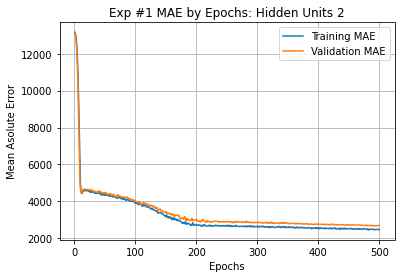

Validation MAE after 500 Epochs: 2681.0725


In [23]:
exp_num = 1
num_epochs = 500
num_hidden_units = 2
batch_size = 1

model1 = build_model(num_hidden_units)
history1 = model1.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_1 = history1.history['mae']
val_mae_1 = history1.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_1)
plt.plot(range(1, num_epochs+1), val_mae_1)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_1[-1]))

## Exp2: Hidden Units = 4

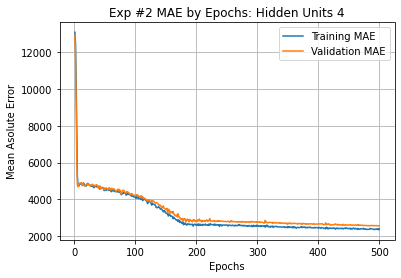

Validation MAE after 500 Epochs: 2574.3835


In [29]:
exp_num = 2
num_epochs = 500
num_hidden_units = 4
batch_size = 1

model2 = build_model(num_hidden_units)
history2 = model2.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_2 = history2.history['mae']
val_mae_2 = history2.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_2)
plt.plot(range(1, num_epochs+1), val_mae_2)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_2[-1]))

## Exp3: Hidden Units = 8

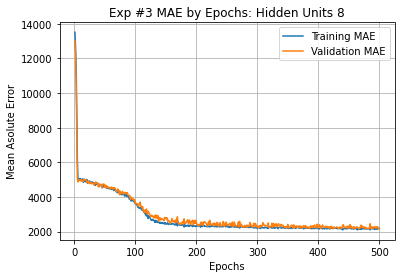

Validation MAE after 500 Epochs: 2169.9397


In [30]:
exp_num = 3
num_epochs = 500
num_hidden_units = 8
batch_size = 1

model3 = build_model(num_hidden_units)
history3 = model3.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_3 = history3.history['mae']
val_mae_3 = history3.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_3)
plt.plot(range(1, num_epochs+1), val_mae_3)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_3[-1]))

## Exp4: Hidden Units = 16

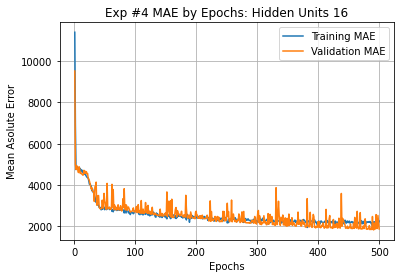

Validation MAE after 500 Epochs: 1861.2418


In [31]:
exp_num = 4
num_epochs = 500
num_hidden_units = 16
batch_size = 1

model4 = build_model(num_hidden_units)
history4 = model4.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_4 = history4.history['mae']
val_mae_4 = history4.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_4)
plt.plot(range(1, num_epochs+1), val_mae_4)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_4[-1]))

## Exp5: Hidden Units = 32

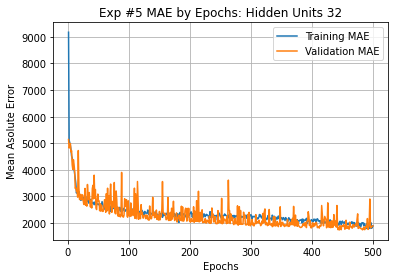

Validation MAE after 500 Epochs: 1892.5836


In [32]:
exp_num = 5
num_epochs = 500
num_hidden_units = 32
batch_size = 1

model5 = build_model(num_hidden_units)
history5 = model5.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_5 = history5.history['mae']
val_mae_5 = history5.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_5)
plt.plot(range(1, num_epochs+1), val_mae_5)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_5[-1]))

## Exp6: Hidden Units = 64

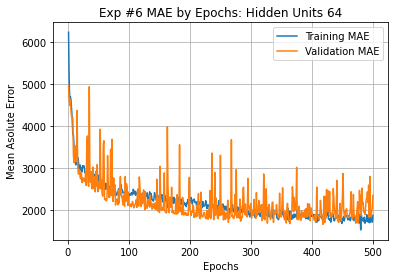

Validation MAE after 500 Epochs: 2349.3982


In [33]:
exp_num = 6
num_epochs = 500
num_hidden_units = 64
batch_size = 1

model6 = build_model(num_hidden_units)
history6 = model6.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_6 = history6.history['mae']
val_mae_6 = history6.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_6)
plt.plot(range(1, num_epochs+1), val_mae_6)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_6[-1]))

## Exp7: Hidden Units = 128

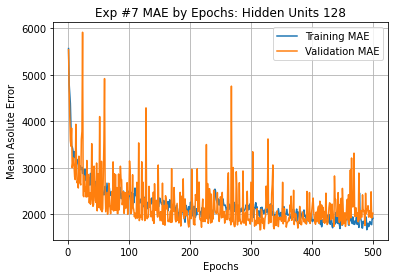

Validation MAE after 500 Epochs: 2024.5156


In [34]:
exp_num = 7
num_epochs = 500
num_hidden_units = 128
batch_size = 1

model7 = build_model(num_hidden_units)
history7 = model7.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_7 = history7.history['mae']
val_mae_7 = history7.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_7)
plt.plot(range(1, num_epochs+1), val_mae_7)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_7[-1]))

## Exp8: Hidden Units = 256

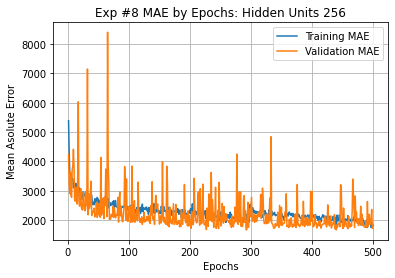

Validation MAE after 500 Epochs: 1726.7687


In [36]:
exp_num = 8
num_epochs = 500
num_hidden_units = 256
batch_size = 1

model8 = build_model(num_hidden_units)
history8 = model8.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_8 = history8.history['mae']
val_mae_8 = history8.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_8)
plt.plot(range(1, num_epochs+1), val_mae_8)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after {e} Epochs: {v:.4f}".format(e=num_epochs, v=val_mae_8[-1]))

## Comparing the Results for Varying Number of Hidden Units

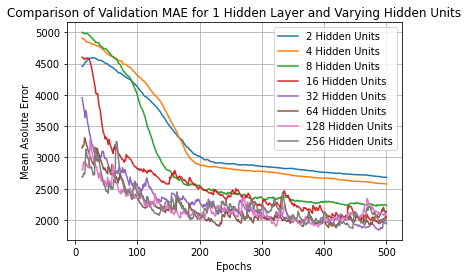

In [37]:
total_experiments = 8
plt.clf()
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_1[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_2[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_3[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_4[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_5[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_6[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_7[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_8[10:]))
plt.title('Comparison of Validation MAE for 1 Hidden Layer and Varying Hidden Units')
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend([
  '{units} Hidden Units'.format(units=2**i) for i in range(1, total_experiments + 1)
], loc='upper right')
plt.grid()
plt.show()

After comparing the results of these models, it can be seen that the model in experiment 5 with 32 hidden units performs best.

# Final Model

In [38]:
model = build_model(32)
model.fit(
  np.vstack((x_train, x_val)),
  np.hstack((y_train, y_val)),
  epochs=num_epochs,
  batch_size=batch_size,
  verbose=False
)

# Final Evaluation

In [43]:
result = model.evaluate(x_test, y_test)

print("Test MAE: {v:.4f}".format(v=result[1]))

2/2 [==============================] - 0s 9ms/step - loss: 14379196.0000 - mae: 2274.9548
Test MAE: 2274.9548
